In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount='True')

In [ ]:
import pandas as pd
import os
import glob
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [ ]:
%cd /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-41-c68f92ee6649>", line 1, in <cell line: 1>
    get_ipython().run_line_magic('cd', '/content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings')
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/pytho

In [ ]:
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))

appended_data = []
for f in csv_files:
    df = pd.read_csv(f)
    #print('Location:', f)
    print('File Name:', f.split("\\")[-1])
    print('Content:', df.shape)
    #display(df)

    #Dropping unnecessary Text column
    df.drop(['listing_url', 'host_thumbnail_url','host_picture_url','picture_url','host_url','scrape_id','last_scraped','bathrooms',
             'calendar_updated'], axis=1, inplace=True)

    #Converting mixed columns into standard data types
    df['neighbourhood_group_cleansed'] = df['neighbourhood_group_cleansed'].astype(str)
    df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].astype(str)
    df['license'] = df['license'].astype(str)

    #Handling Text columns
    df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
    df['name'] = df['name'].str.lower()
    df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
    df['description'] = df['description'].str.lower()
    df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
    df['neighborhood_overview'] = df['neighborhood_overview'].str.lower()
    df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
    df['host_name'] = df['host_name'].str.lower()
    df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')
    df['host_location'] = df['host_location'].str.lower()
    df['host_about'] = df.host_about.str.replace('[^\sa-zA-Z]', ' ')
    df['host_about'] = df['host_about'].str.lower()
    df['host_verifications'] = df.host_verifications.str.replace('[^\sa-zA-Z]', ' ')
    df['host_verifications'] = df['host_verifications'].str.lower()
    df['host_response_rate'] = df.host_response_rate.str.replace('%','')
    df['host_acceptance_rate'] = df.host_acceptance_rate.str.replace('%','')
    df['host_neighbourhood'] = df.host_neighbourhood.str.replace('[^\sa-zA-Z]', ' ')
    df['host_neighbourhood'] = df['host_neighbourhood'].str.lower()
    df['neighbourhood'] = df.neighbourhood.str.replace('[^\sa-zA-Z]', ' ')
    df['neighbourhood'] = df['neighbourhood'].str.lower()
    df['neighbourhood_cleansed'] = df.neighbourhood_cleansed.str.replace('[^\sa-zA-Z]', ' ')
    df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].str.lower()
    df['neighbourhood_cleansed'] = df.neighbourhood_cleansed.str.replace('[^\sa-zA-Z]', ' ')
    df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].str.lower()
    df['neighbourhood_group_cleansed'] = df.neighbourhood_group_cleansed.str.replace('[^\sa-zA-Z]', ' ')
    df['neighbourhood_group_cleansed'] = df['neighbourhood_group_cleansed'].str.lower()
    df['amenities'] = df.amenities.str.replace('[^\sa-zA-Z,]', ' ')
    df['amenities'] = df['amenities'].str.lower()
    df['price'] = df.price.str.replace('[$,]', '')

    #Handling Text NaN values in text columns entered by the host
    df['name'].fillna("Not entered",inplace=True)
    df['description'].fillna("Not entered",inplace=True)
    df['neighborhood_overview'].fillna("Not entered",inplace=True)
    df['host_name'].fillna("Not entered",inplace=True)
    df['host_location'].fillna("Not entered",inplace=True)
    df['host_about'].fillna("Not entered",inplace=True)

    #Handling Date time values
    df[['host_since']] = df[['host_since']].apply(pd.to_datetime)
    df[['calendar_last_scraped']] = df[['calendar_last_scraped']].apply(pd.to_datetime)
    df[['first_review']] = df[['first_review']].apply(pd.to_datetime)
    df[['last_review']] = df[['last_review']].apply(pd.to_datetime)

    #Handling Numerical Columns
    df['host_response_rate'] = df['host_response_rate'].astype(float)
    df['host_acceptance_rate'] = df['host_acceptance_rate'].astype(float)
    df['host_listings_count'] = df['host_listings_count'].astype(float)
    df['host_total_listings_count'] = df['host_total_listings_count'].astype(float)
    df['minimum_nights'] = df['minimum_nights'].astype(int)
    df['maximum_nights'] = df['maximum_nights'].astype(int)
    df['minimum_minimum_nights'] = df['minimum_minimum_nights'].astype(float)
    df['maximum_minimum_nights'] = df['maximum_minimum_nights'].astype(float)
    df['minimum_maximum_nights'] = df['minimum_maximum_nights'].astype(float)
    df['maximum_maximum_nights'] = df['maximum_maximum_nights'].astype(float)
    df['minimum_nights_avg_ntm'] = df['minimum_nights_avg_ntm'].astype(float)
    df['maximum_nights_avg_ntm'] = df['maximum_nights_avg_ntm'].astype(float)
    df['accommodates'] = df['accommodates'].astype(float)
    df['price'] = df['price'].astype(float)
    df['availability_30'] = df['availability_30'].astype(int)
    df['availability_60'] = df['availability_60'].astype(int)
    df['availability_90'] = df['availability_90'].astype(int)
    df['availability_365'] = df['availability_365'].astype(int)
    df['number_of_reviews'] = df['number_of_reviews'].astype(int)
    df['number_of_reviews_ltm'] = df['number_of_reviews_ltm'].astype(int)
    df['number_of_reviews_l30d'] = df['number_of_reviews_l30d'].astype(int)
    df['review_scores_rating'] = df['review_scores_rating'].astype(float)
    df['review_scores_accuracy'] = df['review_scores_accuracy'].astype(float)
    df['review_scores_checkin'] = df['review_scores_checkin'].astype(float)
    df['review_scores_cleanliness'] = df['review_scores_cleanliness'].astype(float)
    df['review_scores_location'] = df['review_scores_location'].astype(float)
    df['review_scores_value'] = df['review_scores_value'].astype(float)
    df['calculated_host_listings_count'] = df['calculated_host_listings_count'].astype(int)
    df['calculated_host_listings_count_entire_homes'] = df['calculated_host_listings_count_entire_homes'].astype(int)
    df['calculated_host_listings_count_private_rooms'] = df['calculated_host_listings_count_private_rooms'].astype(int)
    df['calculated_host_listings_count_shared_rooms'] = df['calculated_host_listings_count_shared_rooms'].astype(int)
    df['reviews_per_month'] = df['reviews_per_month'].astype(float)

    # Handling Boolean Columns
    df['host_is_superhost'] = df['host_is_superhost'].map({'t': True, 'f': False})
    df['host_is_superhost'] = df['host_is_superhost'].astype(bool)
    df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': True, 'f': False})
    df['host_identity_verified'] = df['host_identity_verified'].map({'t': True, 'f': False})
    df['has_availability'] = df['has_availability'].map({'t': True, 'f': False})
    df['instant_bookable'] = df['instant_bookable'].map({'t': True, 'f': False})


    appended_data.append(df)
appended_data = pd.concat(appended_data)
listings = appended_data
listings.shape

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_ca_la.csv
Content: (42041, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_ca_oakland.csv
Content: (3001, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_ca_pg.csv
Content: (322, 74)
File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_ca_sd.csv
Content: (13272, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_ca_sf.csv
Content: (6444, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_ca_san_mateo.csv
Content: (3358, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_ca_santa_clara.csv
Content: (5729, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_ca_santa_cruz.csv
Content: (1671, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_co_denver.csv
Content: (5435, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_dc_washington_dc.csv
Content: (6308, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_fl_broward.csv
Content: (15399, 74)


<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:32: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_about'] = df.host_about.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:34: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_verifications'] = df.host_verifications.str.r

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_hawaii.csv
Content: (26345, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_il_chicago.csv
Content: (6720, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_la_new_orleans.csv
Content: (6687, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_ma_boston.csv
Content: (4903, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_ma_cambridge.csv
Content: (2867, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_mn_msa.csv
Content: (3949, 74)


<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:32: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_about'] = df.host_about.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:34: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_verifications'] = df.host_verifications.str.r

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_nc_ashville.csv
Content: (2856, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_nj_newark.csv
Content: (1476, 74)
File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_nj_new_jersey.csv
Content: (2398, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_nv_clark_county.csv
Content: (13842, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_ny_newyork.csv
Content: (37410, 74)


<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:32: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_about'] = df.host_about.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:34: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_verifications'] = df.host_verifications.str.r

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_oh_columbus.csv
Content: (2001, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_or_portland.csv
Content: (4365, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_or_salem.csv
Content: (199, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_ri_rhode.csv
Content: (4561, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_tn_nashville.csv
Content: (7243, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_tx_austin.csv
Content: (17071, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_tx_dallas.csv
Content: (6573, 75)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_tx_fort_worth.csv
Content: (1707, 74)


<ipython-input-34-e29d9e11b463>:44: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighbourhood_cleansed'] = df.neighbourhood_cleansed.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:46: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighbourhood_group_cleansed'] = df.neighbourhood_group_cleansed.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:48: FutureWarning: The default value of regex will change from True to False in a future version.
  df['amenities'] = df.amenities.str.replace('[^\sa-zA-Z,]', ' ')
<ipython-input-34-e29d9e11b463>:50: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price'] = df.price.str.replace('[$,]', '')


File Name: /content/gdrive/MyDrive/CA683-DataMining_AirBnb Assignment/Listings/listings_wa_seattle.csv
Content: (5355, 74)


<ipython-input-34-e29d9e11b463>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-34-e29d9e11b463>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[^\sa-zA-Z]', ' ')

(261508, 66)

In [ ]:
backup = listings
backup1 = listings
listings = backup
print(backup1.shape)
print(backup.shape)

(261508, 66)
(261508, 66)


In [ ]:
# Removing the duplicates from the ID column
listings = listings.sort_values(['calendar_last_scraped'],ascending=False).groupby('id').head()
listings = listings.drop_duplicates(subset='id', keep="first")
listings[listings['id'] == 33809493 ]

,id,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,source
816,33809493,mountain gem extra sanitizing,we are offering an in law apartment on the low...,the neighborhood is very quiet and tranquil t...,17462893,anna,2014-06-30,atlanta georgia united states,hello i m an avid traveler love to learn and...,within an hour,95.0,99.0,True,NaN,2.0,2.0,email phone,True,True,los gatos california united states,unincorporated areas,nan,37.15607,-121.981,Entire guest suite,Entire home/apt,4.0,1 bath,1.0,2.0,"beach essentials , security cameras on prop...",136.0,1,30,1.0,1.0,30.0,30.0,1.0,30.0,True,11,11,11,11,2022-06-27,89,27,3,2019-05-10,2022-06-19,4.9,4.91,4.96,4.99,4.96,4.94,4.79,nan,False,2,2,0,0,2.33,NaN


In [ ]:
listings.shape

(256887, 66)

In [ ]:
df['description'] = df.description.str.replace('[\s+]', ' ')
df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[\s+]', ' ')
df['host_name'] = df.host_name.str.replace('[\s+]', ' ')
df['host_location'] = df.host_location.str.replace('[\s+]', ' ')
df['host_about'] = df.host_about.str.replace('[\s+]', ' ')
df['host_verifications'] = df.host_verifications.str.replace('[\s+]', ' ')
df['host_neighbourhood'] = df.host_neighbourhood.str.replace('[\s+]', ' ')
df['neighbourhood'] = df.neighbourhood.str.replace('[\s+]', ' ')
df['neighbourhood_cleansed'] = df.neighbourhood_cleansed.str.replace('[\s+]', ' ')
df['neighbourhood_cleansed'] = df.neighbourhood_cleansed.str.replace('[\s+]', ' ')
df['neighbourhood_group_cleansed'] = df.neighbourhood_group_cleansed.str.replace('[\s+]', ' ')
df['amenities'] = df.amenities.str.replace('[\s+]', ' ')

<ipython-input-9-9b2b846ff898>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace('[\s+]', ' ')
<ipython-input-9-9b2b846ff898>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['neighborhood_overview'] = df.neighborhood_overview.str.replace('[\s+]', ' ')
<ipython-input-9-9b2b846ff898>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_name'] = df.host_name.str.replace('[\s+]', ' ')
<ipython-input-9-9b2b846ff898>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_location'] = df.host_location.str.replace('[\s+]', ' ')
<ipython-input-9-9b2b846ff898>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['host_about'] = df.host_about.str.replace('[\s+]', ' ')
<ipython-input-9-9b2b846ff8

In [ ]:
#Removing the host name column
listings.drop(['host_name'],axis=1, inplace=True)

In [ ]:
#Calculating host listing months
from datetime import datetime, timedelta

now=datetime.now()
listings['host_months'] = (now - listings['host_since']).astype('<m8[Y]')
days_in_year = 365.2425  # average number of days in a year, including leap years
listings['host_years'] = (now - listings['host_since']).astype('<m8[Y]') / 12

listings['first_review_months'] = (now - listings['first_review']).astype('<m8[Y]')
listings['first_review_years'] = (now - listings['first_review']).astype('<m8[Y]') / 12

listings['last_review_months'] = (now - listings['last_review']).astype('<m8[Y]')
listings['last_review_years'] = -(now - listings['last_review']).astype('<m8[Y]') / 12


array([[<Axes: title={'center': 'host_months'}>]], dtype=object)

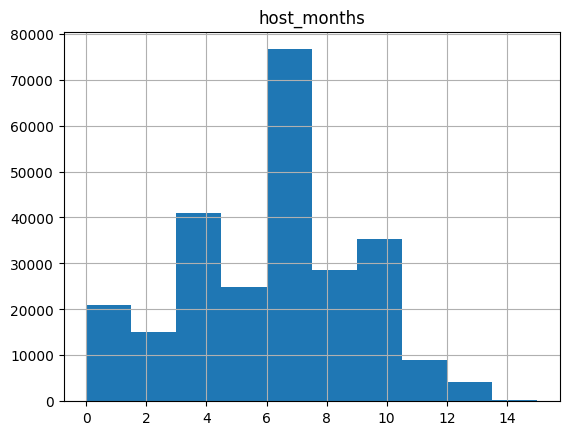

In [ ]:
listings.hist(column='host_months')


In [ ]:
#binning the host listing months
listings['host_months_classes'] = ""
listings.loc[(listings.host_months > 0 ) & (listings.host_months <= 2),  'host_months_classes'] = '0-2'
listings.loc[(listings.host_months > 2 ) & (listings.host_months <= 4),  'host_months_classes'] = '2-4'
listings.loc[(listings.host_months > 4 ) & (listings.host_months <= 6),  'host_months_classes'] = '4-6'
listings.loc[(listings.host_months > 6 ) & (listings.host_months <= 8),  'host_months_classes'] = '6-8'
listings.loc[(listings.host_months > 8 ) & (listings.host_months <= 10),  'host_months_classes'] = '8-10'
listings.loc[(listings.host_months > 10 ) & (listings.host_months <= 12),  'host_months_classes'] = '10-12'
listings.loc[(listings.host_months > 12 ) & (listings.host_months <= 14),  'host_months_classes'] = '12-14'
listings.loc[(listings.host_months > 14 ) & (listings.host_months <= 16),  'host_months_classes'] = '14-16'
listings.loc[(listings.host_months).isnull(),  'host_months_classes'] = np.NaN

In [ ]:
listings['host_response_time_score'] = 0.0
listings.loc[(listings.host_response_time == 'within an hour'), 'host_response_time_score'] = 4.0
listings.loc[(listings.host_response_time == 'within a few hours'), 'host_response_time_score'] = 3.0
listings.loc[(listings.host_response_time == 'within a day'), 'host_response_time_score'] = 2.0
listings.loc[(listings.host_response_time == 'a few days or more'), 'host_response_time_score'] = 1.0
listings.loc[(listings.host_response_time).isnull(), 'host_response_time_score'] = np.NaN

In [ ]:
#Convert all boolean columns to int 0 and 1
listings['host_is_superhost_int'] = listings['host_is_superhost'].astype(int)

listings['host_has_profile_pic'] = listings['host_has_profile_pic'].fillna(False)
listings['host_has_profile_pic_int'] = listings['host_has_profile_pic'].astype(int)

listings['host_identity_verified'] = listings['host_identity_verified'].fillna(False)
listings['host_identity_verified_int'] = listings['host_identity_verified'].astype(int)

listings['has_availability'] = listings['has_availability'].fillna(False)
listings['has_availability_int'] = listings['has_availability'].astype(int)

listings['instant_bookable'] = listings['instant_bookable'].fillna(False)
listings['instant_bookable_int'] = listings['instant_bookable'].astype(int)

In [ ]:
listings.head()

,id,name,description,neighborhood_overview,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_months,host_years,first_review_months,first_review_years,last_review_months,last_review_years,host_months_classes,host_response_time_score,host_is_superhost_int,host_has_profile_pic_int,host_identity_verified_int,has_availability_int,instant_bookable_int,host_verifications_score,Entire home/apt,Hotel room,Private room,Shared room,bathroom_shared,has_license
1749,43755549,brand new building minute walk to katy trail,brand new fully furnished apartment in victor...,Not entered,17423355,2014-06-29,tempe az,Not entered,NaN,NaN,NaN,False,oak lawn,1.0,1.0,phone work email,True,True,NaN,district,nan,32.789230,-96.806530,Entire rental unit,Entire home/apt,2.0,1,1.0,1.0,"pool , iron , hangers , dryer , essentia...",70.0,20,60,20.0,20.0,1125.0,1125.0,20.0,1125.0,False,0,0,0,0,2022-08-14,2,0,0,2020-08-15,2021-01-10,5.00,5.00,5.00,4.5,5.00,5.00,5.00,<NA>,False,1,1,0,0,0.08,8.0,0.666667,2.0,0.166667,2.0,-0.166667,6-8,NaN,0,1,1,0,0,2.0,1,0,0,0,False,0
694,27200251,night at the dj s a quirky dallas stay living ...,welcome to dallas i m a local dj and am excit...,Not entered,156708848,2017-10-29,ann arbor mi,graduate student studying american culture at ...,NaN,NaN,73.0,True,far north dallas,2.0,2.0,email phone,True,True,NaN,district,nan,33.013714,-96.842468,Private room in rental unit,Private room,1.0,1,1.0,7.0,"dishwasher , extra pillows and blankets , ...",40.0,1,14,1.0,1.0,1125.0,1125.0,1.0,1125.0,True,0,0,0,0,2022-08-14,2,2,0,2021-09-17,2021-12-24,5.00,5.00,5.00,5.0,5.00,5.00,5.00,<NA>,True,2,0,1,1,0.18,5.0,0.416667,1.0,0.083333,1.0,-0.083333,4-6,NaN,1,1,1,1,1,2.0,0,0,1,0,True,0
967,34336901,sqft luxurious oaklawn downtown yard,families business groups come and stay in lux...,located right off maple ave in the famed oak l...,430957331,2021-11-08,dallas tx,Not entered,NaN,NaN,NaN,False,NaN,37.0,40.0,email phone,True,False,dallas texas united states,district,nan,32.805520,-96.817940,Entire home,Entire home/apt,12.0,6,6.0,6.0,"dishwasher , iron , essentials , dryer , ...",938.0,5,1125,5.0,25.0,1125.0,1125.0,22.8,1125.0,True,0,0,9,9,2022-08-14,7,0,0,2019-05-26,2019-12-27,4.71,4.71,5.00,5.0,4.57,4.86,4.71,<NA>,True,20,20,0,0,0.18,1.0,0.083333,3.0,0.250000,3.0,-0.250000,0-2,NaN,0,1,0,1,1,2.0,1,0,0,0,False,0
1245,39111239,story oak lawn a location patio grill gar...,spacious and upscale story urban townhouse l...,convenient driving and uber lyft distance from...,294095422,2019-09-11,dallas tx,Not entered,NaN,NaN,100.0,True,oak lawn,1.0,1.0,email phone,True,True,dallas texas united states,district,nan,32.816780,-96.811610,Entire townhouse,Entire home/apt,8.0,2.5,2.0,3.0,"dishwasher , extra pillows and blankets , ...",100.0,2,1125,1.0,3.0,1125.0,1125.0,1.6,1125.0,True,0,0,0,0,2022-08-14,38,10,0,2020-01-12,2022-01-02,4.92,4.87,4.66,5.0,5.00,4.79,4.79,<NA>,True,1,1,0,0,1.21,3.0

In [ ]:
listings['host_verifications_score'] = 0.0
listings.loc[(listings.host_verifications == '  phone    work email  '), 'host_verifications_score'] = 2.0
listings.loc[(listings.host_verifications == '  email    phone  '), 'host_verifications_score'] = 2.0
listings.loc[(listings.host_verifications == '  email    phone    work email  '), 'host_verifications_score'] = 3.0
listings.loc[(listings.host_verifications == '  email    work email  '), 'host_verifications_score'] = 2.0
listings.loc[(listings.host_verifications == '  phone  '), 'host_verifications_score'] = 1.0
listings.loc[(listings.host_verifications == '  email  '), 'host_verifications_score'] = 1.0
listings.loc[(listings.host_verifications == '  '), 'host_verifications_score'] = 0.0
listings.loc[(listings.host_verifications == 'none'), 'host_verifications_score'] = 0.0
listings.loc[(listings.host_verifications == '  email    phone    photographer  '), 'host_verifications_score'] = 3.0
listings.loc[(listings.host_verifications == '  email    phone    photographer    work email  '), 'host_verifications_score'] = 4.0
listings.loc[(listings.host_verifications == '  phone    reviews    jumio    offline government id    government id  '), 'host_verifications_score'] = 5.0
listings.loc[(listings.host_verifications == '  email    phone    facebook    work email  '), 'host_verifications_score'] = 4.0
listings.loc[(listings.host_verifications == '  email    phone    offline government id    government id  '), 'host_verifications_score'] = 4.0
listings.loc[(listings.host_verifications == '  email    phone    reviews    jumio    offline government id    government id  '), 'host_verifications_score'] = 6.0
listings.loc[(listings.host_verifications == '  email    phone    facebook    reviews    offline government id    government id  '), 'host_verifications_score'] = 6.0
listings.loc[(listings.host_verifications == '  email    phone    reviews    offline government id    selfie    government id    identity manual  '), 'host_verifications_score'] = 7.0
listings.loc[(listings.host_verifications == '  email    phone    reviews    kba  '), 'host_verifications_score'] = 4.0
listings.loc[(listings.host_verifications == '  email    phone    offline government id    selfie    government id    identity manual    work email  '), 'host_verifications_score'] = 7.0
listings.loc[(listings.host_verifications == '  email    phone    offline government id    selfie    government id    identity manual  '), 'host_verifications_score'] = 6.0
listings.loc[(listings.host_verifications == '  email    phone    jumio    offline government id    selfie    government id    identity manual  '), 'host_verifications_score'] = 7.0
listings.loc[(listings.host_verifications == '  email    phone    facebook    reviews  '), 'host_verifications_score'] = 4.0
listings.loc[(listings.host_verifications == '  email    phone    facebook    jumio    offline government id    government id  '), 'host_verifications_score'] = 6.0
listings.loc[(listings.host_verifications == '  email    phone    reviews    jumio    offline government id    selfie    government id    identity manual  '), 'host_verifications_score'] = 7.0
listings.loc[(listings.host_verifications == '  email    phone    google    reviews    jumio    government id    identity manual    work email  '), 'host_verifications_score'] = 8.0
listings.loc[(listings.host_verifications == '  email    phone    manual online    reviews    manual offline    kba    work email  '), 'host_verifications_score'] = 7.0
listings.loc[(listings.host_verifications == '  email    phone    reviews    jumio    offline government id    kba    selfie    government id    identity manual  '), 'host_verifications_score'] = 10.0
listings.loc[(listings.host_verifications == '  email    phone    reviews  '), 'host_verifications_score'] = 3.0
listings.loc[(listings.host_verifications == '  email    phone    reviews    jumio    offline government id    selfie    government id    identity manual    work email  '), 'host_verifications_score'] = 9.0
listings.loc[(listings.host_verifications == '  email    phone    jumio    offline government id    government id  '), 'host_verifications_score'] = 5.0
listings.loc[(listings.host_verifications == '  email    phone    facebook    reviews    offline government id    selfie    government id  '), 'host_verifications_score'] = 7.0
listings.loc[(listings.host_verifications == '  email    phone    facebook    reviews    jumio    offline government id    selfie    government id    identity manual  '), 'host_verifications_score'] = 9.0
listings.loc[(listings.host_verifications == '  email    phone    facebook    reviews    kba  '), 'host_verifications_score'] = 5.0
listings.loc[(listings.host_verifications == '  email    phone    reviews    offline government id    selfie    government id    identity manual    work email  '), 'host_verifications_score'] = 8.0
listings.loc[(listings.host_verifications == '  email    phone    facebook    offline government id    government id    work email  '), 'host_verifications_score'] = 6.0
listings.loc[(listings.host_verifications == '  email    phone    reviews    offline government id    kba    selfie    government id    identity manual  '), 'host_verifications_score'] = 8.0
listings.loc[(listings.host_verifications == '  email    phone    facebook    reviews    jumio    government id  '), 'host_verifications_score'] = 6.0
listings.loc[(listings.host_verifications == '  email    phone    facebook    jumio    offline government id    selfie    government id    identity manual    work email  '), 'host_verifications_score'] = 9.0
listings.loc[(listings.host_verifications == '  email    phone    jumio    offline government id    selfie    government id  '), 'host_verifications_score'] = 6.0
listings.loc[(listings.host_verifications == '  email    phone    facebook    reviews    jumio    offline government id    government id  '), 'host_verifications_score'] = 7.0
listings.loc[(listings.host_verifications == '  email    phone    facebook    reviews    offline government id    kba    selfie    government id    identity manual    work email  '), 'host_verifications_score'] = 10.0
listings.loc[(listings.host_verifications == '  email    phone    facebook    reviews    jumio    offline government id    kba    selfie    government id    identity manual    work email  '), 'host_verifications_score'] = 11.0
listings.loc[(listings.host_verifications == '  email    phone    offline government id    government id    work email  '), 'host_verifications_score'] = 5.0
listings.loc[(listings.host_verifications == '  phone    reviews    jumio    offline government id    selfie    government id    identity manual  '), 'host_verifications_score'] = 7.0
listings.loc[(listings.host_verifications == '  email    phone    reviews    offline government id    government id  '), 'host_verifications_score'] = 5.0
listings.loc[(listings.host_verifications == '  phone    jumio    offline government id    selfie    government id    identity manual  '), 'host_verifications_score'] = 6.0
listings.loc[(listings.host_verifications == '  email    phone    reviews    jumio    government id    work email  '), 'host_verifications_score'] = 6.0
listings.loc[(listings.host_verifications == '  phone    facebook    reviews  '), 'host_verifications_score'] = 3.0
listings.loc[(listings.host_verifications == '  email    phone    facebook    google    reviews    kba  '), 'host_verifications_score'] = 6.0
listings.loc[(listings.host_verifications == '  email    phone    reviews    jumio    offline government id    kba    government id  '), 'host_verifications_score'] = 7.0
listings.loc[(listings.host_verifications == '  email    phone    manual online    reviews    manual offline    kba  '), 'host_verifications_score'] = 5.0
listings.loc[(listings.host_verifications == '  email    phone    google    reviews    offline government id    kba    selfie    government id    identity manual  '), 'host_verifications_score'] = 8.0
listings.loc[(listings.host_verifications == '  email    phone    google    reviews    offline government id    kba    government id    work email  '), 'host_verifications_score'] = 8.0
listings.loc[(listings.host_verifications == '  email    phone    facebook    reviews    offline government id    kba    selfie    government id    identity manual  '), 'host_verifications_score'] = 9.0
listings.loc[(listings.host_verifications == '  email    phone    jumio    selfie    government id    identity manual    work email  '), 'host_verifications_score'] = 7.0
listings.loc[(listings.host_verifications == '  email    phone    facebook    reviews    jumio    offline government id    government id    work email  '), 'host_verifications_score'] = 8.0


In [ ]:
listings['room_type']=listings['room_type'].astype('category')

one_hot = pd.get_dummies(listings['room_type'])

# Concatenate original DataFrame with one-hot encoded DataFrame
listings = pd.concat([listings, one_hot], axis=1)


In [ ]:
#Creating New column to check if the Bathroom is shared or not
listings['bathroom_shared'] = False
listings.loc[(listings.bathrooms_text.str.contains('shared',na=False)), 'bathroom_shared'] = True

In [ ]:
#backup['bathrooms_text'].head()
listings['bathrooms_text'] = listings['bathrooms_text'].str.replace('[^0-9.]+', '')
listings['bathrooms_text'].head()

<ipython-input-19-f0cd9ecdc18c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  listings['bathrooms_text'] = listings['bathrooms_text'].str.replace('[^0-9.]+', '')


1749      1
694       1
967       6
1245    2.5
1430      1
Name: bathrooms_text, dtype: object

In [ ]:
listings['license'].value_counts()
listings.loc[(listings.license == 'nan'), 'license'] = pd.NA
mask = listings['license'].notnull()
listings['has_license'] = mask.astype(int)
#listings[['license','has_license']].notnull().head(100)

In [ ]:
listings.drop(['source'],axis=1, inplace=True)

In [ ]:
import nltk
nltk.download('stopwords')
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import gensim
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#replace not entered value by space
listings = listings.replace('Not entered','', regex=True)

#Cleaning text values related to listings
listings['name'] = listings.name.str.replace('[^\sa-zA-Z]', ' ')
listings['description'] = listings.description.str.replace('[^\sa-zA-Z]',' ')
listings['neighborhood_overview'] = listings.neighborhood_overview.str.replace('[^\sa-zA-Z]',' ')
listings['neighbourhood'] = listings.neighbourhood.str.replace('[^\sa-zA-Z]',' ')
listings['neighbourhood_cleansed'] = listings.neighbourhood_cleansed.str.replace('[^\sa-zA-Z]',' ')
listings['neighbourhood_group_cleansed'] = listings.neighbourhood_group_cleansed.str.replace('[^\sa-zA-Z]',' ')
listings['property_type'] = listings.property_type.str.replace('[^\sa-zA-Z]',' ')
listings['amenities'] = listings.amenities.str.replace('[^\sa-zA-Z]',' ')

listings['name'] = listings['name'].apply(lambda x: x.lower() if pd.notna(x) else x)
listings['description'] = listings['description'].apply(lambda x: x.lower() if pd.notna(x) else x)
listings['neighborhood_overview'] = listings['neighborhood_overview'].apply(lambda x: x.lower() if pd.notna(x) else x)
listings['neighbourhood_cleansed'] = listings['neighbourhood_cleansed'].apply(lambda x: x.lower() if pd.notna(x) else x)
listings['neighbourhood_cleansed'] = listings['neighbourhood_cleansed'].apply(lambda x: x.lower() if pd.notna(x) else x)
listings['neighbourhood_group_cleansed'] = listings['neighbourhood_group_cleansed'].apply(lambda x: x.lower() if pd.notna(x) else x)
listings['property_type'] = listings['property_type'].apply(lambda x: x.lower() if pd.notna(x) else x)

listings['name'] = listings.name.str.replace('[\s+]', ' ')
listings['description'] = listings.description.str.replace('[\s+]',' ')
listings['neighborhood_overview'] = listings.neighborhood_overview.str.replace('[\s+]',' ')
listings['neighbourhood'] = listings.neighbourhood.str.replace('[\s+]',' ')
listings['neighbourhood_cleansed'] = listings.neighbourhood_cleansed.str.replace('[\s+]',' ')
listings['neighbourhood_group_cleansed'] = listings.neighbourhood_group_cleansed.str.replace('[\s+]',' ')
listings['property_type'] = listings.property_type.str.replace('[\s+]',' ')
listings['amenities'] = listings.amenities.str.replace('[\s+]',' ')

#Removing stop words
stop_words = stopwords.words('english')
def remove_stop_words(text):
    if pd.isna(text):
        return ''
    words = text.split()
    filtered_words = [word for word in words if len(word) > 2 and word not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to the text column
listings['name'] = listings['name'].apply(remove_stop_words)
listings['description'] = listings['description'].apply(remove_stop_words)
listings['neighborhood_overview'] = listings['neighborhood_overview'].apply(remove_stop_words)
listings['neighbourhood'] = listings['neighbourhood'].apply(remove_stop_words)
listings['neighbourhood_cleansed'] = listings['neighbourhood_cleansed'].apply(remove_stop_words)
listings['neighbourhood_group_cleansed'] = listings['neighbourhood_group_cleansed'].apply(remove_stop_words)
listings['property_type'] = listings['property_type'].apply(remove_stop_words)
listings['amenities'] = listings['amenities'].apply(remove_stop_words)

<ipython-input-23-d9b398247f87>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  listings['name'] = listings.name.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-23-d9b398247f87>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  listings['description'] = listings.description.str.replace('[^\sa-zA-Z]',' ')
<ipython-input-23-d9b398247f87>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  listings['neighborhood_overview'] = listings.neighborhood_overview.str.replace('[^\sa-zA-Z]',' ')
<ipython-input-23-d9b398247f87>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  listings['neighbourhood'] = listings.neighbourhood.str.replace('[^\sa-zA-Z]',' ')
<ipython-input-23-d9b398247f87>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  listings['neighbourhoo

In [ ]:
#Cleaning text values related to host
listings['host_location'] = listings.host_location.str.replace('[^\sa-zA-Z]', ' ')
listings['host_about'] = listings.host_about.str.replace('[^\sa-zA-Z]',' ')
listings['host_neighbourhood'] = listings.host_neighbourhood.str.replace('[^\sa-zA-Z]',' ')

listings['host_location'] = listings['host_location'].apply(lambda x: x.lower() if pd.notna(x) else x)
listings['host_about'] = listings['host_about'].apply(lambda x: x.lower() if pd.notna(x) else x)
listings['host_neighbourhood'] = listings['host_neighbourhood'].apply(lambda x: x.lower() if pd.notna(x) else x)

listings['host_location'] = listings.host_location.str.replace('[\s+]', ' ')
listings['host_about'] = listings.host_about.str.replace('[\s+]',' ')
listings['host_neighbourhood'] = listings.host_neighbourhood.str.replace('[\s+]',' ')

#Removing stop words
stop_words = stopwords.words('english')
def remove_stop_words(text):
    if pd.isna(text):
        return ''
    words = text.split()
    filtered_words = [word for word in words if len(word) > 2 and word not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to the text column
listings['host_location'] = listings['host_location'].apply(remove_stop_words)
listings['host_about'] = listings['host_about'].apply(remove_stop_words)
listings['host_neighbourhood'] = listings['host_neighbourhood'].apply(remove_stop_words)

<ipython-input-24-d053ca887486>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  listings['host_location'] = listings.host_location.str.replace('[^\sa-zA-Z]', ' ')
<ipython-input-24-d053ca887486>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  listings['host_about'] = listings.host_about.str.replace('[^\sa-zA-Z]',' ')
<ipython-input-24-d053ca887486>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  listings['host_neighbourhood'] = listings.host_neighbourhood.str.replace('[^\sa-zA-Z]',' ')
<ipython-input-24-d053ca887486>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  listings['host_location'] = listings.host_location.str.replace('[\s+]', ' ')
<ipython-input-24-d053ca887486>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  listings['host_

In [ ]:
#Stemming
import pandas as pd
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_text(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

listings['name'] = listings['name'].apply(stem_text)
listings['description'] = listings['description'].apply(stem_text)
listings['neighborhood_overview'] = listings['neighborhood_overview'].apply(stem_text)
listings['neighbourhood'] = listings['neighbourhood'].apply(stem_text)
listings['neighbourhood_cleansed'] = listings['neighbourhood_cleansed'].apply(stem_text)
listings['neighbourhood_group_cleansed'] = listings['neighbourhood_group_cleansed'].apply(stem_text)
listings['property_type'] = listings['property_type'].apply(stem_text)
listings['amenities'] = listings['amenities'].apply(stem_text)
listings['host_location'] = listings['host_location'].apply(stem_text)
listings['host_about'] = listings['host_about'].apply(stem_text)
listings['host_neighbourhood'] = listings['host_neighbourhood'].apply(stem_text)

In [ ]:
#Lemmatization
import pandas as pd
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

listings['name'] = listings['name'].apply(lemmatize_text)
listings['description'] = listings['description'].apply(lemmatize_text)
listings['neighborhood_overview'] = listings['neighborhood_overview'].apply(lemmatize_text)
listings['neighbourhood'] = listings['neighbourhood'].apply(lemmatize_text)
listings['neighbourhood_cleansed'] = listings['neighbourhood_cleansed'].apply(lemmatize_text)
listings['neighbourhood_group_cleansed'] = listings['neighbourhood_group_cleansed'].apply(lemmatize_text)
listings['property_type'] = listings['property_type'].apply(lemmatize_text)
listings['amenities'] = listings['amenities'].apply(lemmatize_text)
listings['host_location'] = listings['host_location'].apply(lemmatize_text)
listings['host_about'] = listings['host_about'].apply(lemmatize_text)
listings['host_neighbourhood'] = listings['host_neighbourhood'].apply(lemmatize_text)


In [ ]:
#Combining host and listings data in one column

listings['listings_text'] = listings['name'] + " " + listings['description'] + " " + listings['neighborhood_overview'] + " " + listings['neighbourhood'] + " " + listings['neighbourhood_cleansed'] + " " + listings['neighbourhood_group_cleansed'] + " " + listings['property_type'] + " " + listings['amenities']
listings['host_text'] = listings['host_location'] + " " + listings['host_about'] + " " + listings['host_neighbourhood']

In [ ]:
listings.head()

,id,name,description,neighborhood_overview,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_months,host_years,first_review_months,first_review_years,last_review_months,last_review_years,host_months_classes,host_response_time_score,host_is_superhost_int,host_has_profile_pic_int,host_identity_verified_int,has_availability_int,instant_bookable_int,host_verifications_score,Entire home/apt,Hotel room,Private room,Shared room,bathroom_shared,has_license,listings_text,host_text
1749,43755549,brand new build minut walk kati trail,brand new fulli furnish apart victori park adj...,,17423355,2014-06-29,temp,,NaN,NaN,NaN,False,oak lawn,1.0,1.0,phone work email,True,True,,district,nan,32.789230,-96.806530,entir rental unit,Entire home/apt,2.0,1,1.0,1.0,pool iron hanger dryer essenti free park premi...,70.0,20,60,20.0,20.0,1125.0,1125.0,20.0,1125.0,False,0,0,0,0,2022-08-14,2,0,0,2020-08-15,2021-01-10,5.00,5.00,5.00,4.5,5.00,5.00,5.00,<NA>,False,1,1,0,0,0.08,8.0,0.666667,2.0,0.166667,2.0,-0.166667,6-8,NaN,0,1,1,0,0,2.0,1,0,0,0,False,0,brand new build minut walk kati trail brand ne...,temp oak lawn
694,27200251,night quirki dalla stay live room,welcom dalla local excit consid stay place cou...,,156708848,2017-10-29,ann arbor,graduat student studi american cultur univers ...,NaN,NaN,73.0,True,far north dalla,2.0,2.0,email phone,True,True,,district,nan,33.013714,-96.842468,privat room rental unit,Private room,1.0,1,1.0,7.0,dishwash extra pillow blanket iron essenti dry...,40.0,1,14,1.0,1.0,1125.0,1125.0,1.0,1125.0,True,0,0,0,0,2022-08-14,2,2,0,2021-09-17,2021-12-24,5.00,5.00,5.00,5.0,5.00,5.00,5.00,<NA>,True,2,0,1,1,0.18,5.0,0.416667,1.0,0.083333,1.0,-0.083333,4-6,NaN,1,1,1,1,1,2.0,0,0,1,0,True,0,night quirki dalla stay live room welcom dalla...,ann arbor graduat student studi american cultu...
967,34336901,sqft luxuri oaklawn downtown yard,famili busi group come stay luxuri style settl...,locat right mapl ave fame oak lawn area minut ...,430957331,2021-11-08,dalla,,NaN,NaN,NaN,False,,37.0,40.0,email phone,True,False,dalla texa unit state,district,nan,32.805520,-96.817940,entir home,Entire home/apt,12.0,6,6.0,6.0,dishwash iron essenti dryer oven stove lockbox...,938.0,5,1125,5.0,25.0,1125.0,1125.0,22.8,1125.0,True,0,0,9,9,2022-08-14,7,0,0,2019-05-26,2019-12-27,4.71,4.71,5.00,5.0,4.57,4.86,4.71,<NA>,True,20,20,0,0,0.18,1.0,0.083333,3.0,0.250000,3.0,-0.250000,0-2,NaN,0,1,0,1,1,2.0,1,0,0,0,False,0,sqft luxuri oaklawn downtown yard famili busi ...,dalla
1245,39111239,stori oak lawn locat patio grill garag,spaciou upscal stori urban townhous locat oak ...,conveni drive uber lyft distanc sever dalla mu...,294095422,2019-09-11,dalla,,NaN,NaN,100.0,True,oak lawn,1.0,1.0,email phone,True,True,dalla texa unit state,district,nan,32.816780,-96.811610,entir townhous,Entire home/apt,8.0,2.5,2.0,3.0,dishwash extra pillow blanket iron essenti dry...,100.0,2,1125,1.0,3.0,1125.0,11

In [ ]:
listings.to_csv('StemmedData.csv',index=False)